In [1]:
#http://stat-computing.org/dataexpo/2009/the-data.html

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import timedelta,date
import datetime

In [22]:
data = pd.read_csv('C:/Users/snasir/Desktop/DSA/Python/airline_arrivals.csv')

In [23]:
airline_raw = data.sample(n=100000, random_state=100)
del data
airline_raw.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2815734,2008,5,24,6,1339.0,1340,1626.0,1635,NW,284,...,6.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3469890,2008,6,1,7,2131.0,2138,2229.0,2240,9E,5867,...,5.0,24.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1833281,2008,4,16,3,1738.0,1730,1838.0,1835,WN,3429,...,2.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
98132,2008,1,28,1,1916.0,1920,2032.0,2031,XE,444,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4957204,2008,9,12,5,634.0,638,1021.0,1000,XE,2585,...,6.0,30.0,0,NaN,0,0.0,0.0,21.0,0.0,0.0


In [24]:
airline_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2815734 to 3119335
Data columns (total 29 columns):
Year                 100000 non-null int64
Month                100000 non-null int64
DayofMonth           100000 non-null int64
DayOfWeek            100000 non-null int64
DepTime              98141 non-null float64
CRSDepTime           100000 non-null int64
ArrTime              97921 non-null float64
CRSArrTime           100000 non-null int64
UniqueCarrier        100000 non-null object
FlightNum            100000 non-null int64
TailNum              98868 non-null object
ActualElapsedTime    97874 non-null float64
CRSElapsedTime       99992 non-null float64
AirTime              97874 non-null float64
ArrDelay             97874 non-null float64
DepDelay             98141 non-null float64
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
TaxiIn               97921 non-null float64
TaxiOut    

In [25]:
airline_raw.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [26]:
missing = airline_raw.isnull().mean()*100
missing_values = pd.DataFrame({'column_name': airline_raw.columns,
                                 'percent_missing': missing})
print(missing_values)

                         column_name  percent_missing
Year                            Year            0.000
Month                          Month            0.000
DayofMonth                DayofMonth            0.000
DayOfWeek                  DayOfWeek            0.000
DepTime                      DepTime            1.859
CRSDepTime                CRSDepTime            0.000
ArrTime                      ArrTime            2.079
CRSArrTime                CRSArrTime            0.000
UniqueCarrier          UniqueCarrier            0.000
FlightNum                  FlightNum            0.000
TailNum                      TailNum            1.132
ActualElapsedTime  ActualElapsedTime            2.126
CRSElapsedTime        CRSElapsedTime            0.008
AirTime                      AirTime            2.126
ArrDelay                    ArrDelay            2.126
DepDelay                    DepDelay            1.859
Origin                        Origin            0.000
Dest                        

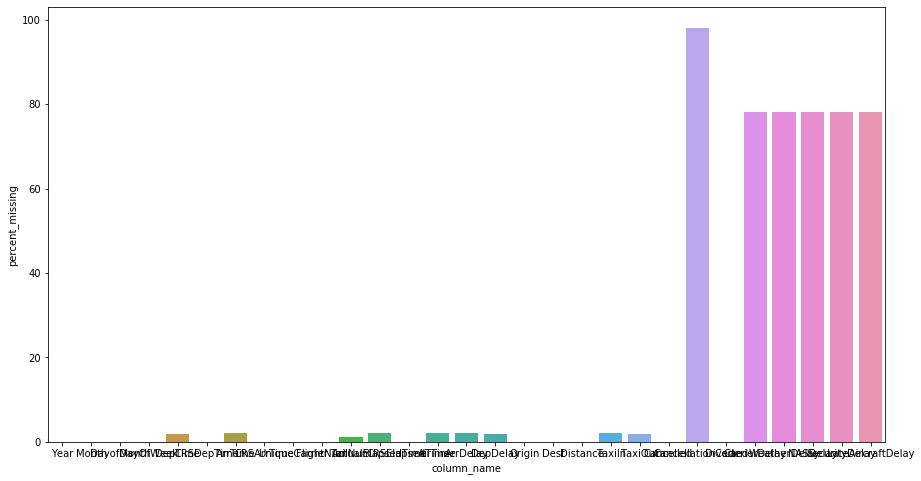

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(x='column_name',y='percent_missing',data=missing_values)

In [52]:
#data[data.DepTime.isnull()]

# get cancellation data in separate df
cancel = airline_raw[airline_raw.Cancelled==1].copy()
# cancel
# remove cancellation data from the full data

airline = airline_raw[airline_raw.Cancelled==0].copy()
airline.drop(['Cancelled','CancellationCode'], axis=1,inplace=True)

In [53]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98122 entries, 2815734 to 3119335
Data columns (total 27 columns):
Year                 98122 non-null int64
Month                98122 non-null int64
DayofMonth           98122 non-null int64
DayOfWeek            98122 non-null int64
DepTime              98122 non-null float64
CRSDepTime           98122 non-null int64
ArrTime              97921 non-null float64
CRSArrTime           98122 non-null int64
UniqueCarrier        98122 non-null object
FlightNum            98122 non-null int64
TailNum              98122 non-null object
ActualElapsedTime    97874 non-null float64
CRSElapsedTime       98118 non-null float64
AirTime              97874 non-null float64
ArrDelay             97874 non-null float64
DepDelay             98122 non-null float64
Origin               98122 non-null object
Dest                 98122 non-null object
Distance             98122 non-null int64
TaxiIn               97921 non-null float64
TaxiOut              98

In [54]:
# get date for flight

airline['Date'] = pd.to_datetime(airline[['DayofMonth','Month','Year']].astype(str).apply(' '.join, 1), format='%d %m %Y')

In [55]:
airline.drop(['DayofMonth','Month','Year'], axis=1, inplace=True)

airline.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
2815734,6,1339.0,1340,1626.0,1635,NW,284,N777NC,107.0,115.0,...,610,6.0,13.0,0,NaN,NaN,NaN,NaN,NaN,2008-05-24
3469890,7,2131.0,2138,2229.0,2240,9E,5867,89869E,58.0,62.0,...,163,5.0,24.0,0,NaN,NaN,NaN,NaN,NaN,2008-06-01
1833281,3,1738.0,1730,1838.0,1835,WN,3429,N908WN,60.0,65.0,...,296,2.0,9.0,0,NaN,NaN,NaN,NaN,NaN,2008-04-16
98132,1,1916.0,1920,2032.0,2031,XE,444,N11544,76.0,71.0,...,376,5.0,7.0,0,NaN,NaN,NaN,NaN,NaN,2008-01-28
4957204,5,634.0,638,1021.0,1000,XE,2585,N12922,167.0,142.0,...,872,6.0,30.0,0,0.0,0.0,21.0,0.0,0.0,2008-09-12


In [56]:
airline.ArrDelay.value_counts(dropna=False)

-5.0      3132
-8.0      3013
-6.0      3003
-4.0      2993
-7.0      2973
          ... 
 558.0       1
 408.0       1
 931.0       1
 449.0       1
-58.0        1
Name: ArrDelay, Length: 462, dtype: int64

In [57]:
airline.ArrDelay.describe()

count    97874.000000
mean         8.194679
std         38.084619
min        -63.000000
25%        -10.000000
50%         -2.000000
75%         12.000000
max       1193.000000
Name: ArrDelay, dtype: float64

In [61]:
# check for NA in arrival time
airline.isnull().sum()

DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
CarrierDelay         76038
WeatherDelay         76038
NASDelay             76038
SecurityDelay        76038
LateAircraftDelay    76038
Date                     0
dtype: int64

In [59]:
airline[airline.ArrDelay.isnull()][['DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut','Diverted']]

#check if all the NAs are because of diverted flights
airline[airline.Diverted==0].isnull().sum()



DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Diverted                 0
CarrierDelay         76038
WeatherDelay         76038
NASDelay             76038
SecurityDelay        76038
LateAircraftDelay    76038
Date                     0
dtype: int64

In [60]:
# No arrival time listed for diverted flights, store diverted flights data in deparate df
divert = airline[airline.Diverted==1].copy()
airline = airline[airline.Diverted==0]
airline.drop(['Diverted'], axis=1,inplace=True)

6399973     -63.0
2098639     -60.0
1306692     -58.0
750553      -57.0
5601514     -55.0
            ...  
1044242     872.0
2883991     931.0
4102280     961.0
2787772    1129.0
1094531    1193.0
Name: ArrDelay, Length: 97874, dtype: float64

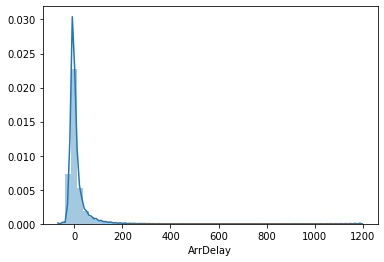

In [71]:
sns.distplot(airline.ArrDelay)
airline.ArrDelay.describe()

## Check max values for airline delay
airline.ArrDelay.sort_values(ascending=False)
airline[airline.ArrDelay>800] # the delay looks legit and we will keep these extreme values

## Check min values for airline delay
airline.ArrDelay.sort_values(ascending=True)


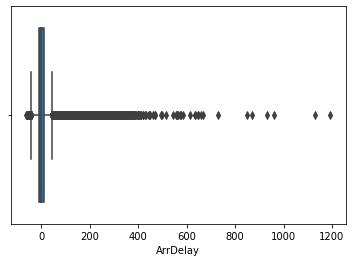

In [63]:
sns.boxplot(airline.ArrDelay)

In [74]:
# make a flag for delayed flight. If the flight is more than 15 minutes late, then we will consider it as late.

airline['Delayed'] = (airline.ArrDelay > 15).astype('int')

In [78]:
airline.Delayed.value_counts()

0    76836
1    21038
Name: Delayed, dtype: int64

In [116]:
#sns.pairplot(airline)
#[['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest']]
airline.Origin.value_counts()

ATL    5868
ORD    4742
DFW    3895
DEN    3497
LAX    2993
       ... 
ACY       1
ACK       1
CMX       1
ITH       1
TEX       1
Name: Origin, Length: 298, dtype: int64

In [107]:

var = ['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest']
for v in var:
    airline[v] = airline[v].astype('category')


In [158]:
# Check delayed flights by origin 

by_orig = airline.groupby('Origin').agg(['sum', 'count'])['Delayed'].sort_values(by='sum',ascending=False).cumsum()
#by_orig
by_orig = by_orig.reset_index()
by_orig

,Origin,sum,count
0,ATL,1476,5868
1,ORD,2936,10610
2,DFW,3874,14505
3,DEN,4658,18002
4,EWR,5277,19896
...,...,...,...
293,CMX,21038,97851
294,MCN,21038,97856
295,SCC,21038,97866
296,ALO,21038,97872


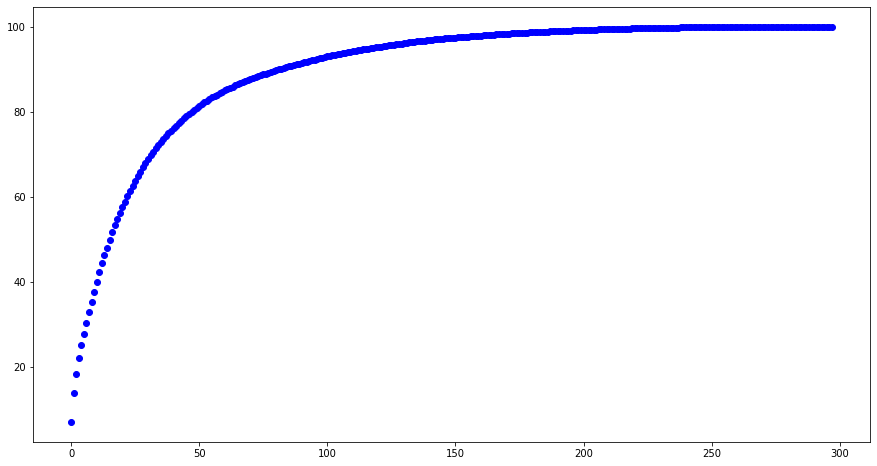

In [165]:
plt.figure(figsize=(15,8))
plt.plot(by_orig['sum']*100/by_orig['sum'].max(),'bo')